In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import os, sys
from importlib import reload

import numpy as np
import numpy.linalg as la
from numpy import fft

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import AsinhStretch
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.visualization import astropy_mpl_style
from astropy.stats import sigma_clipped_stats
from astropy.nddata import NDData

stretch = AsinhStretch()

from photutils.detection import DAOStarFinder
from photutils.psf import EPSFBuilder
from photutils.psf import extract_stars

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use(astropy_mpl_style)
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.interpolation'] = 'none'

In [2]:
sys.path.append('.')

import autils

Load some test data

In [3]:
from astropy.utils.data import download_file

image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )
# image_data = fits.getdata(image_file)
with fits.open(image_file) as hdu: 
    image_data = hdu[0].data
    image_header = hdu[0].header
    image_wcs = WCS(image_header)

In [29]:
reload(autils)

autils.interactive_plot(image_data, wcs=image_wcs)

Output()

AttributeError: module 'matplotlib.pyplot' has no attribute 'transforms'

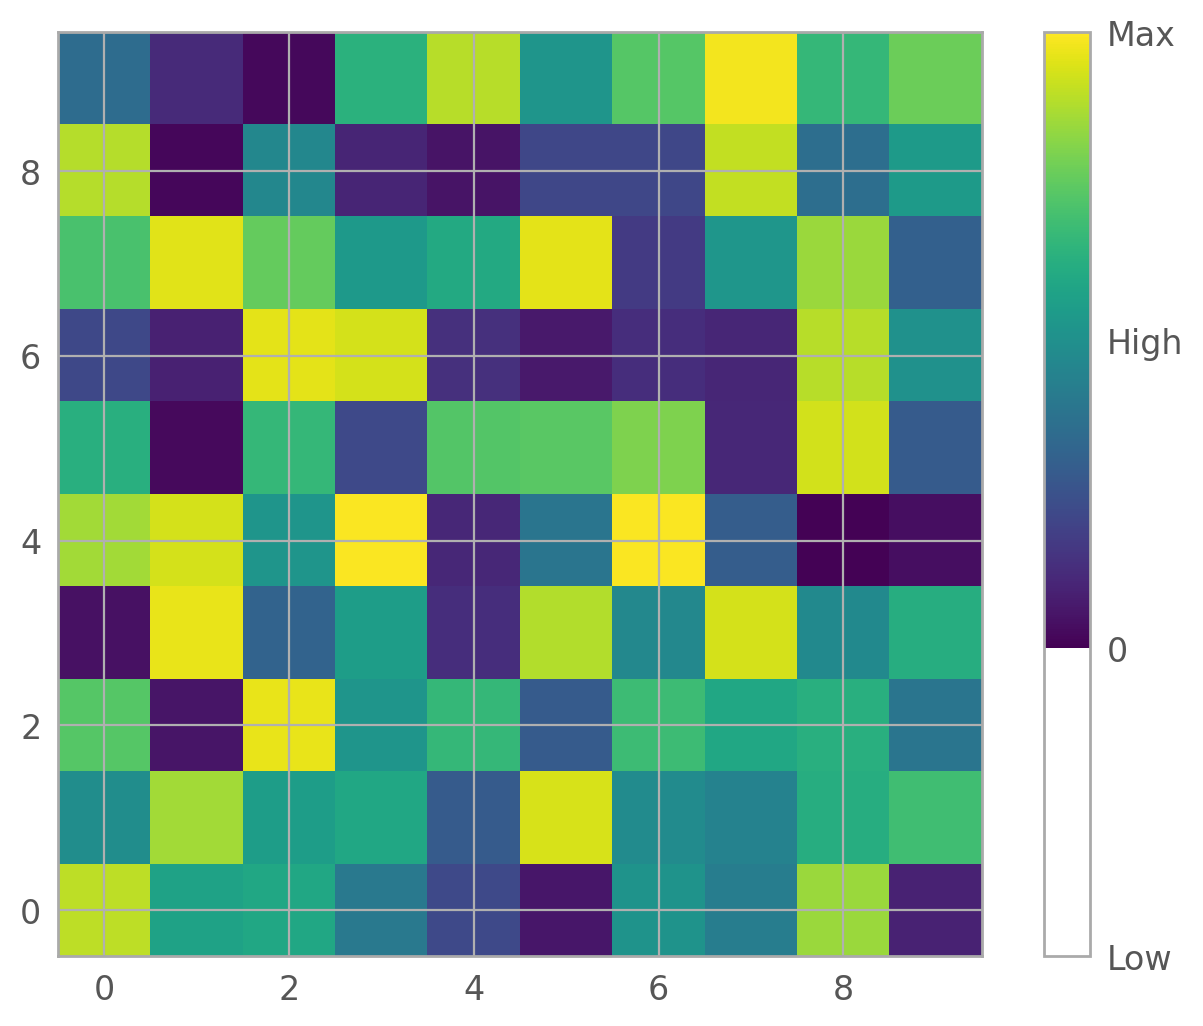

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

# Generate sample data with values up to 2
data = np.random.rand(10, 10) * 2  

# Create a plot
img = plt.imshow(data, cmap='viridis', vmin=0, vmax=2)  # Keep the image color range as is

# Create a colorbar
cbar = plt.colorbar(img)

# Set the color limits of the colorbar
cbar.set_ticks([-1, 0, 1, 2])  # Extended ticks outside the range
cbar.set_ticklabels(['Low', '0', 'High', 'Max'])  # Customize labels

# Function to create an elongated triangle
def create_triangle(length, width):
    return Path([(0, 0), (length, -width), (-length, -width)], closed=True)

# Add upside-down elongated triangle markers to the colorbar
marker_value = 1  # Value where you want the markers
spacing = 0.15    # Control spacing between markers
marker_count = 5  # Number of markers

# Calculate the positions for the markers
y_positions = np.linspace(marker_value - spacing * (marker_count // 2), 
                          marker_value + spacing * (marker_count // 2), 
                          marker_count)

# Draw each elongated triangle marker
for y in y_positions:
    triangle = create_triangle(length=0.1, width=0.2)  # Adjust length and width as needed
    cbar.ax.add_patch(patches.PathPatch(triangle.transformed(
        plt.transforms.Affine2D().translate(1.05, y) + 
        plt.transforms.Affine2D().rotate_deg(180)  # Rotate to make it upside down
    ), facecolor='red', edgecolor='red'))

# Show the plot
plt.show()


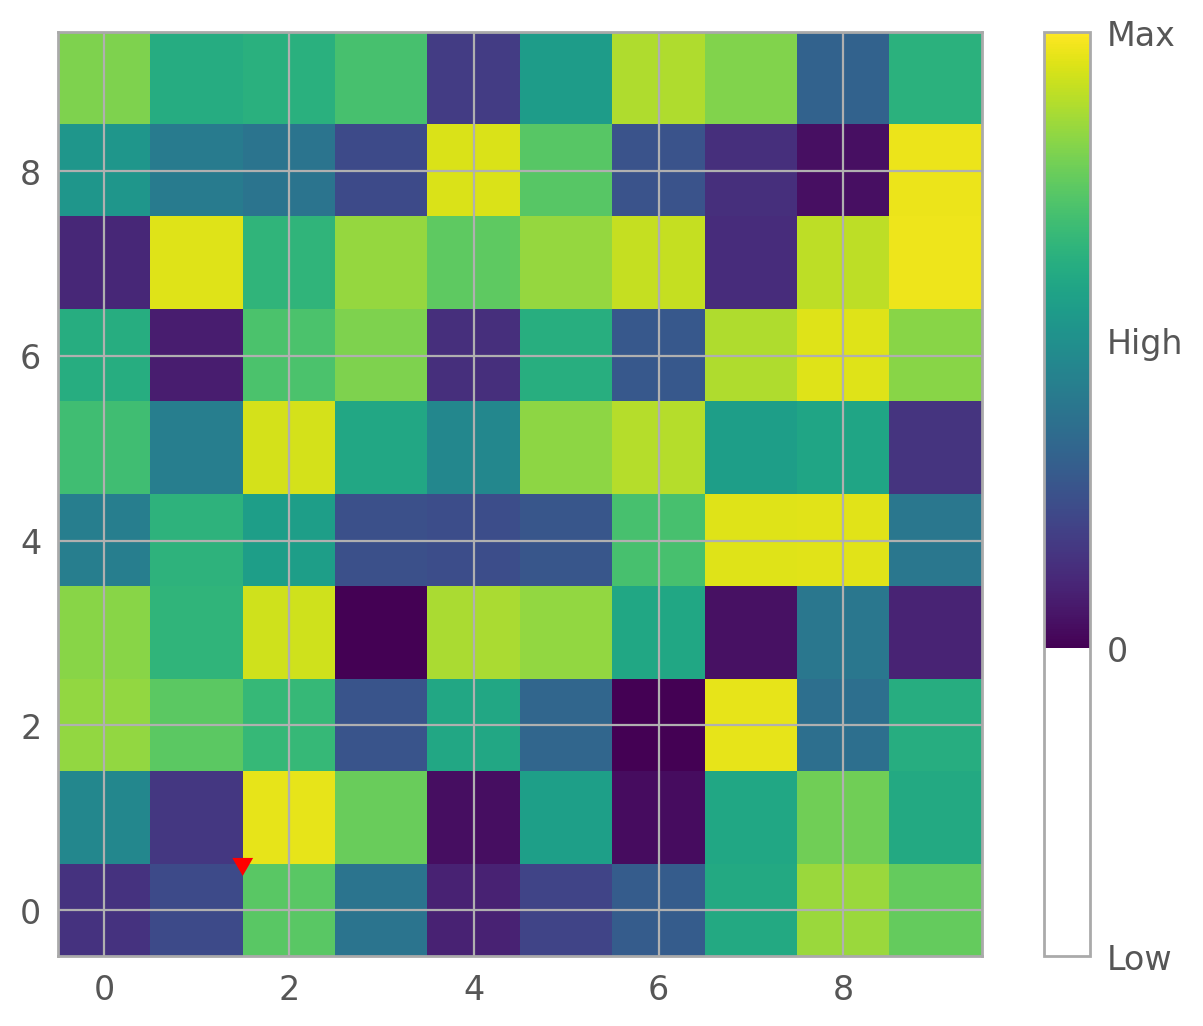

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Generate sample data
data = np.random.rand(10, 10) * 2  

# Create a plot
img = plt.imshow(data, cmap='viridis', vmin=0, vmax=2)  # Display the image

# Create a colorbar
cbar = plt.colorbar(img)

# Set the color limits of the colorbar
cbar.set_ticks([-1, 0, 1, 2])  # Extended ticks outside the range
cbar.set_ticklabels(['Low', '0', 'High', 'Max'])  # Customize labels

# Function to add a triangle at specified coordinates
def add_triangle(ax, x, y, length=0.1, height=0.2, **kwargs):
    triangle = patches.RegularPolygon(
        (x, y), 
        numVertices=3, 
        radius=length, 
        orientation=np.pi,  # Rotate to point upwards
        **kwargs
    )
    ax.add_patch(triangle)

# Coordinates to place the triangle (in data units)
x_coord = 1.5  # X position
y_coord = 0.5  # Y position
triangle_length = 0.1  # Length of the triangle
triangle_height = 0.2   # Height of the triangle

# Add the triangle to the plot
add_triangle(plt.gca(), x_coord, y_coord, length=triangle_length, height=triangle_height, color='red')

# Show the plot
plt.show()


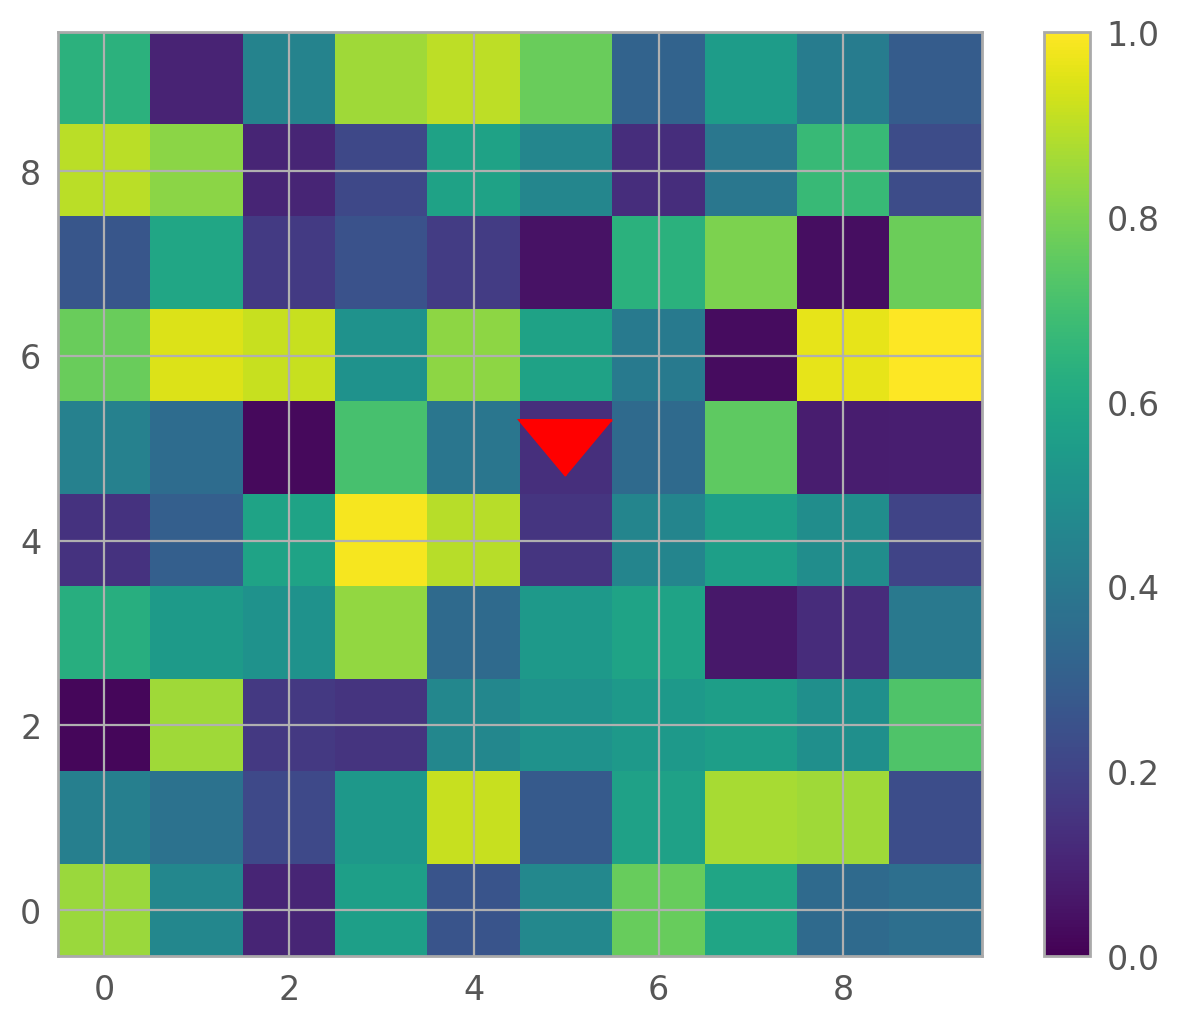

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Generate sample data for the plot
data = np.random.rand(10, 10)  

# Create a plot
plt.imshow(data, cmap='viridis', vmin=0, vmax=1)

# Define the coordinates where you want to place the triangle
x, y = 5, 5  # Coordinates in data units

# Define triangle dimensions
length = 0.5  # Horizontal half-length of the triangle
height = -0.3  # Height of the triangle

# Create the triangle shape
triangle = patches.Polygon(
    [[x, y + height], [x - length, y - height], [x + length, y - height]], 
    closed=False, 
    color='red'
)

# Add the triangle to the plot
plt.gca().add_patch(triangle)

# Show the plot
plt.colorbar()  # Optional: add a colorbar
plt.show()
